**A first hard-coded example of how to use demod**

In [24]:
import datetime
from demod.simulators.base_simulators import SimLogger
from demod.datasets.GermanTOU.loader import GTOU

from demod.simulators.crest_simulators import Crest4StatesModel
from demod.simulators.lighting_simulators import FisherLightingSimulator

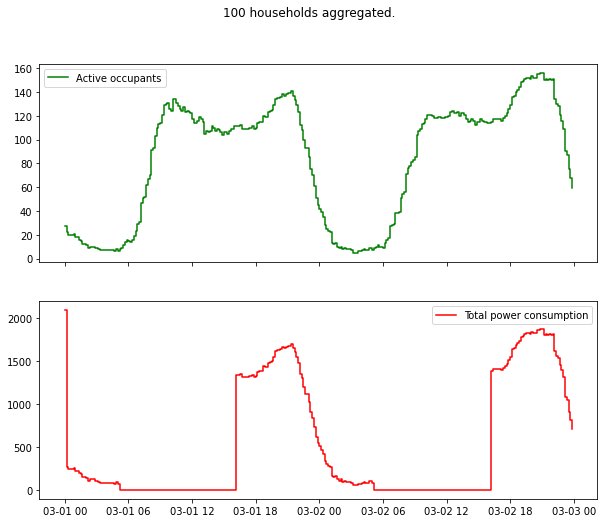

In [25]:
n_households = 100
# Start of the simulation
start_datetime = datetime.datetime(2014, 3, 1, 0, 0, 0)


activity_sim = Crest4StatesModel(
    n_households,
    data=GTOU('4_States'),  # Time of use survey for germany
    start_datetime=start_datetime,  # Specifiy the start of the simulaiton
    logger=SimLogger('get_active_occupancy')
)

lighting_sim = FisherLightingSimulator(
    n_households,
    # Gets the initial values from other simulators
    initial_active_occupancy=activity_sim.get_occupancy(),
    initial_irradiance=climate_sim.get_irradiance(),
    logger=SimLogger('get_power_consumption')
)
# No data was specified, it will use a default dataset.

n_days = 2
for _ in range(n_days*24):
    # step size of one hour
    climate_sim.step()

    for __ in range(6):
        # step size of 10 minutes
        activity_sim.step()
        # two inputs are required for lighting step
        lighting_sim.step(
            active_occupancy=activity_sim.get_active_occupancy(),
            irradiance=climate_sim.get_irradiance()
        )


import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,8))

ten_minute_axis = [
    start_datetime + datetime.timedelta(minutes=10*i)
    for i in range(n_days * 24 * 6)
]
hour_axis = [
    start_datetime + datetime.timedelta(hours=i)
    for i in range(n_days * 24)
]

axes[0].step(
    ten_minute_axis, activity_sim.logger.get('get_active_occupancy'),
    where='post', label='Active occupants', color='green'
)

axes[1].step(
    ten_minute_axis, lighting_sim.logger.get('get_power_consumption'),
    where='post', label='Total power consumption', color='red'
)
[ax.legend() for ax in axes]
fig.suptitle('{} households aggregated.'.format(n_households))

plt.show()
